Epoch 1: learning rate = 0.001
Epoch 2: learning rate = 0.001
Epoch 3: learning rate = 0.001
Epoch 4: learning rate = 0.001
Epoch 5: learning rate = 0.0005
Epoch 6: learning rate = 0.0005
Epoch 7: learning rate = 0.0005
Epoch 8: learning rate = 0.0005
Epoch 9: learning rate = 0.00025
Epoch 10: learning rate = 0.00025
Epoch 11: learning rate = 0.00025
Epoch 12: learning rate = 0.00025
Epoch 13: learning rate = 0.000125
Epoch 14: learning rate = 0.000125
Epoch 15: learning rate = 0.000125
Epoch 16: learning rate = 0.000125
Epoch 17: learning rate = 6.25e-05
Epoch 18: learning rate = 6.25e-05
Epoch 19: learning rate = 6.25e-05
Epoch 20: learning rate = 6.25e-05
Epoch 21: learning rate = 3.125e-05
Epoch 22: learning rate = 3.125e-05
Epoch 23: learning rate = 3.125e-05
Epoch 24: learning rate = 3.125e-05
Epoch 25: learning rate = 1.5625e-05
Epoch 26: learning rate = 1.5625e-05
Epoch 27: learning rate = 1.5625e-05
Epoch 28: learning rate = 1.5625e-05
Epoch 29: learning rate = 7.8125e-06
Epoc

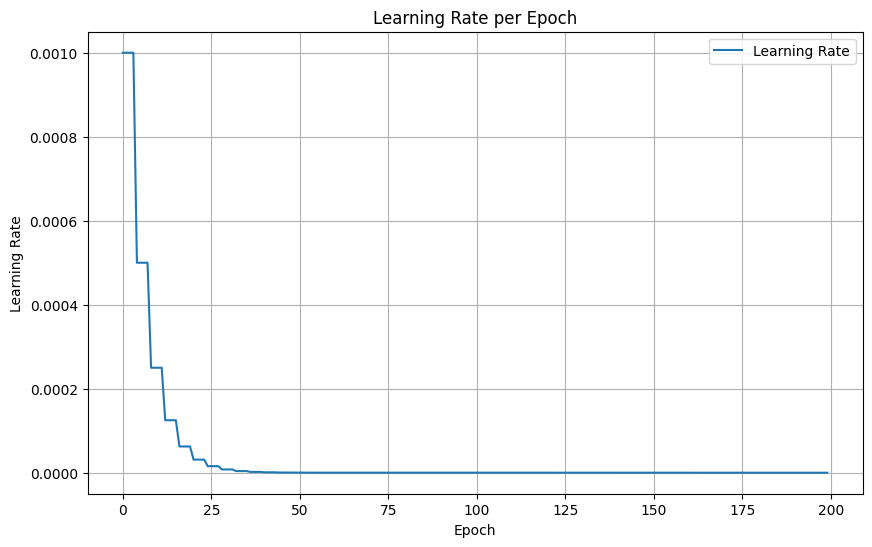

In [28]:
import torch
import torch.optim as optim
from timm.scheduler import CosineLRScheduler
from torch.optim.lr_scheduler import ReduceLROnPlateau
import matplotlib.pyplot as plt

# モデルの定義（例）
model = torch.nn.Linear(10, 2)

# コンフィグレーションの設定（例）
class CFG:
    learning_rate = 0.1

cfg = CFG()

# オプティマイザの定義
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.02)

#CosineLRSchedulerの設定
scheduler = CosineLRScheduler(
    optimizer,
    t_initial=50,      # t_initialを200に設定
    lr_min=1e-4,
    warmup_t=3,
    warmup_lr_init=0.001,
    warmup_prefix=True
)

scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3)

# トレーニングループ
num_epochs = 200
learning_rates = []

for epoch in range(0, num_epochs):
    # トレーニングステップ（例）
    optimizer.zero_grad()
    output = model(torch.randn(10))
    loss = output.sum()
    loss.backward()
    optimizer.step()
    
    # 学習率の更新
    scheduler.step(epoch)
    
    # 現在の学習率を保存
    current_lr = optimizer.param_groups[0]['lr']
    learning_rates.append(current_lr)
    print(f'Epoch {epoch + 1}: learning rate = {current_lr}')

# 学習率のプロット
plt.figure(figsize=(10, 6))
plt.plot(range(num_epochs), learning_rates, label='Learning Rate')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Learning Rate per Epoch')
plt.legend()
plt.grid(True)
plt.show()
